第四章 训练模型

一、线性模型

1、正态方程

2、计算复杂度：O(O^3)/O(n^2.4)

二、梯度下降（计算线性模型的另一种替代方法）

1、步长的选取很重要

（1）步长太小，需要很长的时间才可以收敛到最小值

（2）步长太大，可能会错过最小值，使结果发散

2、标准化数据（可以显著缩短收敛到最小值的时间）

3、可能会落在局域极值，而不是全局最小值

4、批量梯度下降

5、随机梯度下降

6、小批量梯度下降

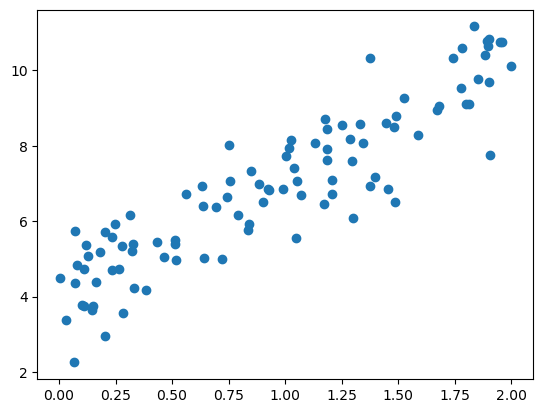

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X,y)
plt.show()


In [2]:
#每组数据点添加x0=1
X_b=np.c_[np.ones((100,1)),X]
print(X_b)

[[1.         1.48867513]
 [1.         0.51362657]
 [1.         1.480675  ]
 [1.         1.90100999]
 [1.         0.23218468]
 [1.         0.14353641]
 [1.         0.56258969]
 [1.         1.58827731]
 [1.         1.90717983]
 [1.         1.8926666 ]
 [1.         0.27759981]
 [1.         0.07125893]
 [1.         0.83769954]
 [1.         0.63926367]
 [1.         1.8992364 ]
 [1.         0.02972795]
 [1.         0.12869597]
 [1.         1.17791383]
 [1.         0.18140766]
 [1.         1.99853225]
 [1.         0.26310062]
 [1.         0.99118047]
 [1.         1.20623991]
 [1.         0.15232936]
 [1.         1.7831218 ]
 [1.         1.03835181]
 [1.         1.77754522]
 [1.         0.20311773]
 [1.         0.16282452]
 [1.         0.24640476]
 [1.         0.8418496 ]
 [1.         0.38490691]
 [1.         0.72207242]
 [1.         1.00381473]
 [1.         0.74209286]
 [1.         1.67077342]
 [1.         0.46491877]
 [1.         0.32186505]
 [1.         1.28776828]
 [1.         0.28183114]


In [3]:
#利用正态方程计算参数
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.9852627 ],
       [3.11199706]])

In [4]:
#利用拟合出的参数模型进行预测
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.9852627 ],
       [10.20925683]])

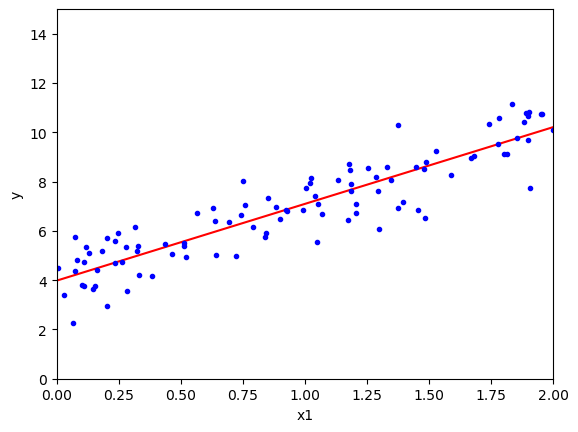

In [5]:
#对结果进行可视化
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

In [6]:
#可以直接调用LinearRegression()进行拟合
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_,lin_reg.predict(X_new)

(array([3.9852627]),
 array([[3.11199706]]),
 array([[ 3.9852627 ],
        [10.20925683]]))

二、梯度下降
4、批量梯度下降

避免收敛时间过长、发散等问题的解决方法：通过格点搜索选取θ的初始值

In [8]:
eta = 0.1 # learning rate
n_iterations = 1000#迭代次数
m = 100 #100个训练点
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients
theta #与正态方程求出的结果相差无几

array([[3.9852627 ],
       [3.11199706]])

二、梯度下降

5、随机梯度下降（Stochastic Gradient Descent）

批量梯度下降vs随机梯度下降

（1）只关注一个训练点

（2）可以更好地脱离局域极值点

（3）但很难最终收敛到最小值（解决方案：模拟退火）

In [9]:
n_epochs=50#迭代次数
t0,t1=5,50#设置模拟退化算法的超参数
def learning_schedule(t):
    return t0/(t+t1)
theta=np.random.rand(2,1)#初始化参数
for epoch in range(n_epochs):#退火次数
    for i in range(m):#只关注一个训练点
        random_index=np.random.randint(m)#随机生成0-m-1中的任一整数
        xi=X_b[random_index:random_index+1]#随机抽取一个训练点
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i) #根据当前迭代的次数调整学习率（随着迭代次数的增加，学习率逐渐降低，即反应温度逐渐降低）
        theta=theta-eta*gradients #更新参数
theta #与正态方程、批量梯度下降算出的结果相差无几

array([[3.99957908],
       [3.08214252]])

In [14]:
#可以直接调用sklearn自带的随机梯度下降的代码
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)#设置迭代次数为50,初始化的学习率为0.1
sgd_reg.fit(X,y.ravel())#y.ravel() 将y转为一维数组
sgd_reg.intercept_,sgd_reg.coef_


(array([4.04028518]), array([3.16408976]))

二、梯度下降

6、小批量梯度下降（Mini-batch Gradient Descent）